In [1]:
from typing import Optional, List, Iterable, Tuple, Dict
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm

import numpy.typing
NDArray = numpy.typing.NDArray[np.floating]

In [2]:
from brownian_datagen import (BrownianDatagen,
                              create_dataholder_for_windows_and_targets,
                              create_simple_flip_dataholder_for_windows_and_targets)
from bayesian import plot_predictions, quality_metrics
from bayesian_varinf import (ExpResultsWithLosses,
                             ExpResultsWithTwoLosses,
                             posterior_predictive_forward_and_backward,
                             train_fb_n_times,
                             load_learning_curves)

(<Figure size 500x1000 with 3 Axes>,
 array([<Axes: title={'center': 'Forward trajectories'}, xlabel='index', ylabel='coordinate of the particle, forward'>,
        <Axes: title={'center': 'Backward trajectories'}, xlabel='index', ylabel='coordinate of the particle, backward'>,
        <Axes: title={'center': 'Work distributions'}>], dtype=object))

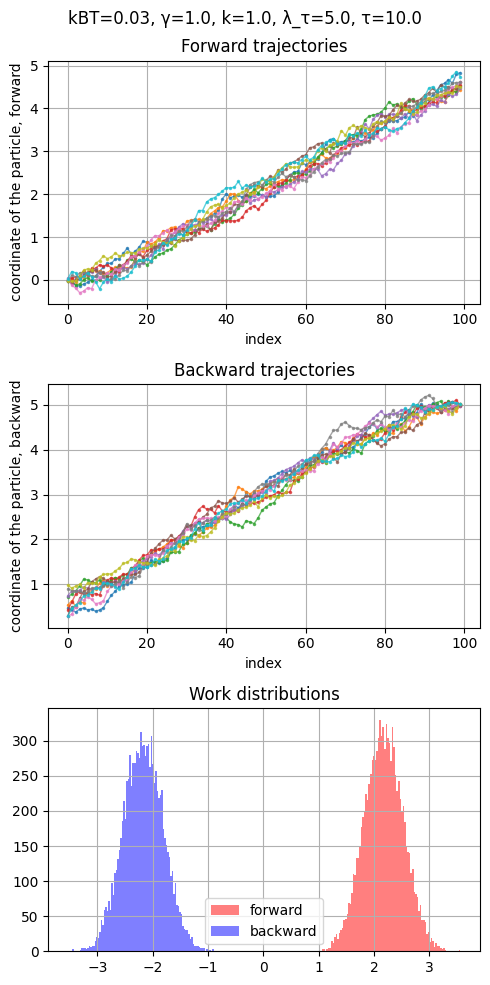

In [3]:
brownian = BrownianDatagen(kBT=0.03, γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_for_windows_and_targets(brownian, numParticles=100, rng_seed=42)
brownian.visualize()

In [4]:
save_dir_prefix = "20230724_preds/brownian_varinf_debugged/test8/"
num_runs = 200
train_fb_n_times(dt, num_runs=num_runs,
                 num_epochs=4000, save_metrics_every_n_epochs=100,
                 hidden_size=6, train_test_split_ratio=0.5,
                 save_dir_prefix=save_dir_prefix)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [11:40:06<00:00, 210.03s/it]


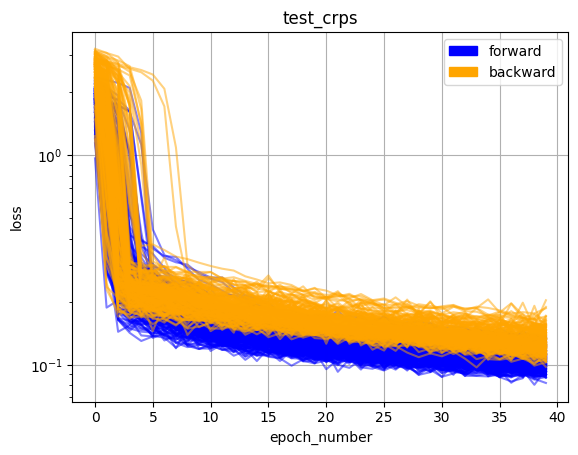

In [5]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="test_crps")
l.plot_learning_curves()

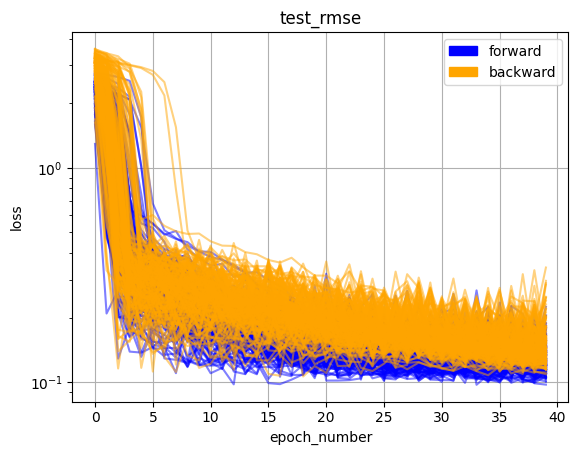

In [6]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="test_rmse")
l.plot_learning_curves()

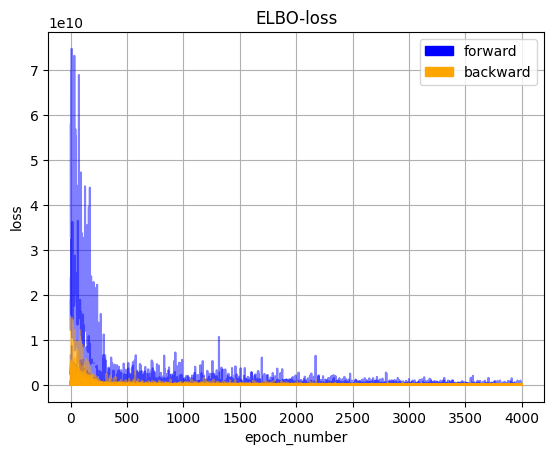

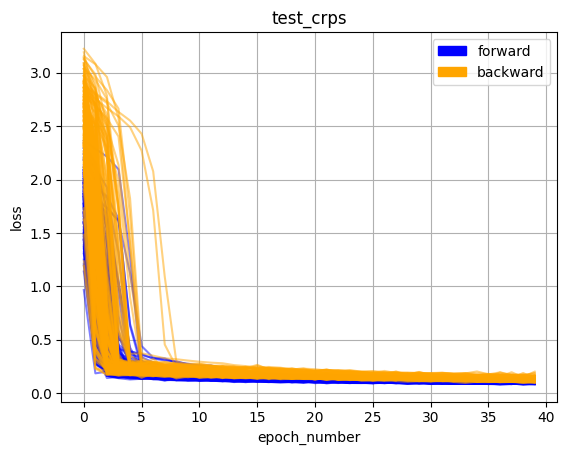

KeyError: 'rmse'

In [7]:
for alt_metric in (None, "test_crps", "rmse", "mae", "mean_std"):
    l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric=alt_metric)
    l.plot_learning_curves(log_scale=False)

In [ ]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric=None)
l.plot_learning_curves(log_scale=False)
l.plot_relmeandiff_vs_epoch()